<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2B: EDA, Visualisation and Modelling

### Contents:
- [Import Libraries and Cleaned Train CSV File](#Import-Libraries-and-Cleaned-Train-CSV-File)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Dropping Columns with < 0.05 Correlation with Target (Sale Price)](#Dropping-Columns-with-<-0.05-Correlation-with-Target-(Sale-Price))
    - [Showing resulting correlation heatmap of columns with above 0.85 correlation](#Showing-resulting-correlation-heatmap-of-columns-with-above-0.85-correlation)
    - [Dropping columns of high correlation to reduce multicollinearity](#Dropping-columns-of-high-correlation-to-reduce-multicollinearity)
- [Modelling](#Modelling)
    - [Create features matrix (X) and target vector (y)](#Create-features-matrix-(X)-and-target-vector-(y))
    - [Train-Test-Split](#Train-Test-Split)
    - [Scaling](#Scaling)
    - [Linear Regression](#Linear-Regression)
    - [Ridge Model](#Ridge-Model)
    - [Lasso Model](#Lasso-Model)
- [Baseline RMSE](#Baseline-RMSE)
- [Evaluation of Results and Choosing Model](#Evaluation-of-Results-and-Choosing-Model)
- [Visualize the Data](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Import Cleaned Test CSV File](#Import-Cleaned-Test-CSV-File)
- [Export and save Final Cleaned Test data into CSV](#Export-and-save-Final-Cleaned-Test-data-into-CSV)
- [Import Final Cleaned Test CSV to run in model](#Import-Final-Cleaned-Test-CSV-to-run-in-model)
- [Export and save Final Cleaned Test data into CSV](#Export-and-save-Final-Cleaned-Test-data-into-CSV)

## Import Libraries and Cleaned Train CSV File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

import scipy.stats as stats

In [2]:
#set max viewable rows and columns so displays will not be truncated
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)

In [3]:
#import cleaned and dummified train data 
train_clean_dummified = pd.read_csv('../data/train_cleaned_dummified.csv')

print(train_clean_dummified.shape)
train_clean_dummified.head()

(2051, 217)


,id,lot_frontage,lot_area,lot_shape,utilities,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,misc_val,mo_sold,yr_sold,saleprice,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_C,ms_zoning_FV,ms_zoning_I,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_Pave,alley_no,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_WdShing,exterior_1st_Wd_Sdng,exterior_2nd_AsphShn,exterior_2nd_BrkFace,exterior_2nd_Brk_Cmn,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd_Sdng,exterior_2nd_Wd_Shng,mas_vnr_type_BrkFace,mas_vnr_type_Stone,mas_vnr_type_no,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_no,fence_GdWo,fence_MnPrv,fence_MnWw,fence_no,misc_feature_Gar2,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,misc_feature_no,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,109,0.0,13517,3,4,6,8,1976,2005,289.0,4,3,3,3,0,6,533.0,1,0.0,192.0,725.0,5,1,725,754,0,0.0,0.0,2,1,3,1,4,6,8,0,0,2,2.0,475.0,3,3,2,0,44,0,0,0,0,0,0,3,2010,130500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0

## Exploratory Data Analysis

### Dropping Columns with < 0.05 Correlation with Target (Sale Price)

Columns that has correlation of below 5% with the target (Sale Price) will be dropped as they do not contribute significantly to the calculations and model. Dropping them will help to reduce the complexity of the models and minimise overfitting, which is likely to occur with over 200 columns.

In [4]:
#pulling the correlation of the columns with the saleprice and sorting it in ascending order
saleprice_corr = abs(train_clean_dummified.corr()[['saleprice']]).sort_values('saleprice', ascending=True)

saleprice_corr.head(20)

,saleprice
condition_2_RRAe,0.002378
foundation_Wood,0.003044
neighborhood_Greens,0.003476
sale_type_CWD,0.004563
roof_matl_Tar&Grv,0.007018
misc_val,0.007375
misc_feature_Othr,0.008841
ms_subclass_150,0.009217
condition_2_Norm,0.009759
exterior_2nd_BrkFace,0.010688


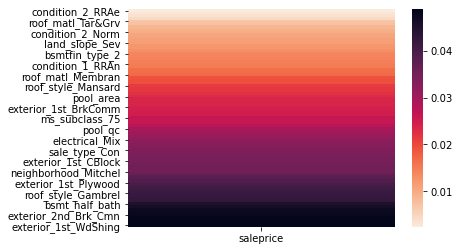

In [5]:
#filter correlation dataframe, keep those with correlation lower than 0.05
sale_corr_below5per = saleprice_corr.loc[saleprice_corr['saleprice'] < 0.05]

#plot heatmap for these correlations, for better visualisation
sale_corr_below5per_heatmap = sns.heatmap(sale_corr_below5per, cmap='rocket_r')


In [6]:
#save these column names in list format, to use for dropping columns further into the project
cols_below5per = list(sale_corr_below5per.index)

In [7]:
#drop the columns with correlation of below 0.05 with saleprice
train_clean_dummified = train_clean_dummified.drop(columns=cols_below5per)


In [8]:
train_clean_dummified.shape

(2051, 136)

### Showing resulting correlation heatmap of columns with above 0.85 correlation

As there are too many columns to be displayed entirely in a correlation matrix heatmap, the correlation of the columns are displayed in a table and sorted so that the columns with the top correlation (above 85% correlation) are displayed.

In [9]:
#find the correlation values between columns
corr = train_clean_dummified.corr()

corr.head(15)

,id,lot_frontage,lot_area,lot_shape,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,1st_flr_sf,2nd_flr_sf,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,saleprice,ms_subclass_30,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_90,ms_subclass_120,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_C,ms_zoning_FV,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_no,land_contour_HLS,land_contour_Lvl,lot_config_CulDSac,lot_config_Inside,land_slope_Mod,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_NAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_2_PosA,condition_2_PosN,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_2Story,house_style_SFoyer,roof_style_Gable,roof_style_Hip,roof_matl_CompShg,roof_matl_WdShngl,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd_Sdng,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd_Sdng,exterior_2nd_Wd_Shng,mas_vnr_type_BrkFace,mas_vnr_type_Stone,mas_vnr_type_no,foundation_CBlock,foundation_PConc,foundation_Slab,heating_Grav,heating_Wall,electrical_FuseF,electrical_FuseP,electrical_SBrkr,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_no,fence_GdWo,fence_MnPrv,fence_no,sale_type_ConLD,sale_type_New,sale_type_WD
id,1.000000,-0.013538,0.032872,-0.011705,-0.061483,-0.026096,-0.064444,-0.090040,-0.035808,-0.071633,-0.045040,0.008009,0.067100,-0.067089,-0.045794,0.008649,-0.038115,-0.029102,-0.047272,-0.022650,-0.008388,-0.033323,-0.059086,-0.042054,0.010605,-0.002400,-0.065466,-0.009092,-0.020809,-0.037560,-0.025826,-0.066017,-0.049616,-0.046105,-0.046450,-0.045039,-0.062328,-0.009045,0.001382,0.033747,0.009758,-0.051398,0.019945,0.020947,0.038880,-0.022502,0.019347,0.017916,-0.025178,-0.019302,0.045694,0.036751,0.020986,-0.058114,-0.016586,0.040998,0.007027,-0.030947,0.026304,-0.036028,0.019913,0.010518,0.004739,-0.029336,-0.009280,0.021445,0.094991,0.074046,0.056410,0.065287,0.064018,-0.035406,-0.012925,-0.079572,-0.001695,0.029677,0.015220,-0.052401,-0.012102,0.033786,0.015350,0.021394,-0.005239,-0.006958,-0.037054,0.011465,0.012367,-0.027822,0.034055,0.017916,-0.013721,-0.014701,0.023007,-0.032236,0.056106,0.007964,-0.015568,-0.037742,0.036158,0.004553,-0.029094,0.003634,0.034089,-0.042136,0.056688,0.010759,-0.045291,0.009022,0.006380,0.054283,-0.030440,0.058161,0.002176,0.001540,-0.077618,0.040694,0.004044,-0.040557,0.003484,-0.024398,0.002287,0.039163,0.014850,-0.048535,-0.025347,-0.004136,-0.047228,0.020583,0.020147,0.034405,-0.016969,0.001283,0.013181,-0.036906,0.103437,-0.047898
lot_frontage,-0.013538,1.000000,0.135586,0.174018,0.114469,-0.032452,0.020571,0.058942,0.101672,0.100055,0.042790,-0.001906,0.089879,-0.047541,0.056742,0.147324,0.204375,0.062938,-0.001910,0.230839,-0.014954,0.009850,0.055042,-0.031017,0.097450,0.015079,0.106405,0.185083,-0.004607,0.038556,0.079360,0.067980,0.118258,0.173790,0.000419,-0.001781,-0.036746,0.011388,0.095295,0.009207,0.036598,0.181456,-0.016078,-0.006929,-0.000349,0.047702,0.013508,0.002052,-0.165748,-0.210040,-0.074835,0.041104,0.017829,-0.042740,0.122958,-0.114896,

In [10]:
#clean up the dataframe using .stack() and .reset_index()
#the columns and the corresponding correlation is displayed side by side in 3 columns
corr_cleaned = corr.stack().reset_index()

#rename the columns accordingly
corr_cleaned.columns = ['var_1', 'var_2', 'correlation']

print(corr_cleaned.head(15))

   var_1           var_2  correlation
0     id              id     1.000000
1     id    lot_frontage    -0.013538
2     id        lot_area     0.032872
3     id       lot_shape    -0.011705
4     id    overall_qual    -0.061483
5     id    overall_cond    -0.026096
6     id      year_built    -0.064444
7     id  year_remod/add    -0.090040
8     id    mas_vnr_area    -0.035808
9     id      exter_qual    -0.071633
10    id       bsmt_qual    -0.045040
11    id       bsmt_cond     0.008009
12    id   bsmt_exposure     0.067100
13    id  bsmtfin_type_1    -0.067089
14    id    bsmtfin_sf_1    -0.045794


In [11]:
#further clean the dataframe and remove rows where the correlation = 1.0
#correlation of 1.0 indicates the column's correlation with itself, so we can remove them
corr_cleaned.drop(corr_cleaned[corr_cleaned['correlation'] == 1.0].index, inplace=True)

corr_cleaned.sort_values(by='correlation', ascending=False, inplace=True)

corr_cleaned.head(30)

,var_1,var_2,correlation
14379,exterior_2nd_CmentBd,exterior_1st_CemntBd,0.988379
13569,exterior_1st_CemntBd,exterior_2nd_CmentBd,0.988379
7024,ms_subclass_190,bldg_type_2fmCon,0.977762
12019,bldg_type_2fmCon,ms_subclass_190,0.977762
15063,exterior_2nd_VinylSd,exterior_1st_VinylSd,0.977569
14118,exterior_1st_VinylSd,exterior_2nd_VinylSd,0.977569
13843,exterior_1st_MetalSd,exterior_2nd_MetalSd,0.976461
14653,exterior_2nd_MetalSd,exterior_1st_MetalSd,0.976461
4794,garage_cond,garage_qual,0.950493
4659,garage_qual,garage_cond,0.950493


In [12]:
#save those with correlation of more than 0.85 into a separate dataframe to show in heatmap
corr_above_85percent = corr_cleaned.loc[corr_cleaned['correlation'] > 0.85]

corr_above_85percent.shape

(22, 3)

In [13]:
#turn corr_above_85percent back into correlation matrix for plotting into heatmap
corr_matrix = corr_above_85percent.pivot(index='var_1', columns='var_2')['correlation']

corr_matrix.head(15)

var_2,bldg_type_2fmCon,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_VinylSd,exterior_1st_Wd_Sdng,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_MetalSd,exterior_2nd_VinylSd,exterior_2nd_Wd_Sdng,fireplace_qu,fireplaces,garage_area,garage_cars,garage_cond,garage_qual,house_style_1.5Unf,ms_subclass_190,ms_subclass_45,ms_zoning_FV,neighborhood_Somerst
var_1,,,,,,,,,,,,,,,,,,,,,,
bldg_type_2fmCon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977762,NaN,NaN,NaN
exterior_1st_CemntBd,NaN,NaN,NaN,NaN,NaN,NaN,0.988379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exterior_1st_HdBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.885877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exterior_1st_MetalSd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.976461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exterior_1st_VinylSd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exterior_1st_Wd_Sdng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.859205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exterior_2nd_CmentBd,NaN,0.988379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exterior_2nd_HdBoard,NaN,NaN,0.885877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exterior_2nd_MetalSd,NaN,NaN,NaN,0.976461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


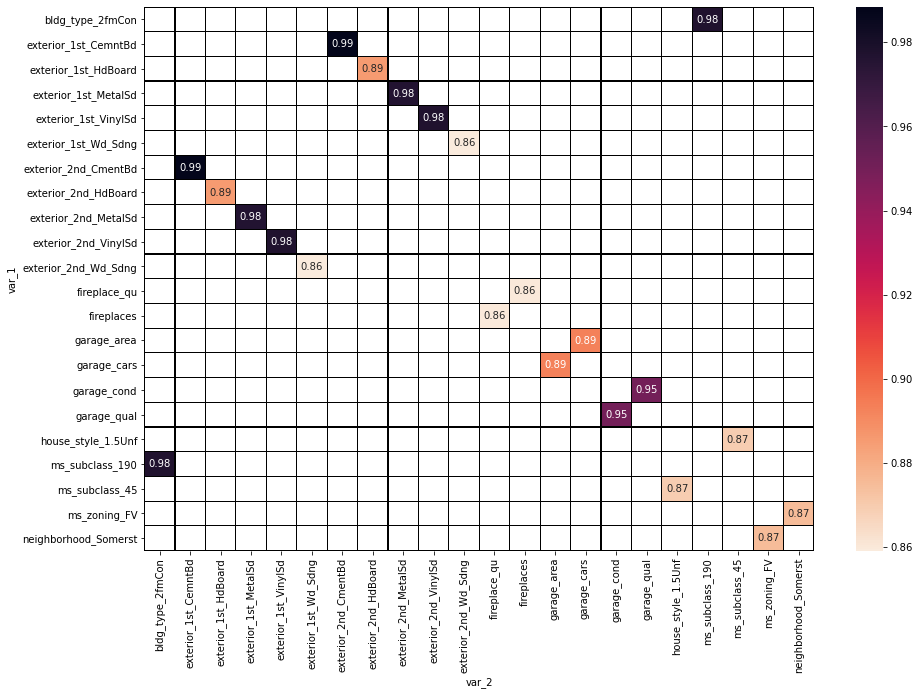

In [14]:
#plotting heatmap for better visualisation
plt.figure(figsize=(15,10));

above85percent_heatmap = sns.heatmap(corr_matrix, linewidths=0.2, linecolor='black', cmap='rocket_r',annot=True)

plt.show();

The columns shown in the heatmap above have high correlation with each other, which will hinder the interpretation of the model and cause an issue of overfitting. As such, one column in each pair will be dropped.

### Dropping columns of high correlation to reduce multicollinearity

From the top correlated columns shown in the heatmap above, we drop one of the two correlated columns in order to reduce multicollinearity.

In [15]:
#display the columns
corr_above_85percent

,var_1,var_2,correlation
14379,exterior_2nd_CmentBd,exterior_1st_CemntBd,0.988379
13569,exterior_1st_CemntBd,exterior_2nd_CmentBd,0.988379
7024,ms_subclass_190,bldg_type_2fmCon,0.977762
12019,bldg_type_2fmCon,ms_subclass_190,0.977762
15063,exterior_2nd_VinylSd,exterior_1st_VinylSd,0.977569
14118,exterior_1st_VinylSd,exterior_2nd_VinylSd,0.977569
13843,exterior_1st_MetalSd,exterior_2nd_MetalSd,0.976461
14653,exterior_2nd_MetalSd,exterior_1st_MetalSd,0.976461
4794,garage_cond,garage_qual,0.950493
4659,garage_qual,garage_cond,0.950493


In [16]:
#exterior_2nd_CmentBd and exterior_1st_CemntBd has correlation of 0.988, drop one of the columns
train_clean_dummified = train_clean_dummified.drop(columns=['exterior_1st_CemntBd'])

In [17]:
#bldg_type_2fmCon and ms_subclass_190 has correlation of 0.978, drop one of the columns
train_clean_dummified = train_clean_dummified.drop(columns=['bldg_type_2fmCon'])

In [18]:
#exterior_1st_VinylSd and exterior_2nd_VinylSd has correlation of 0.978, drop one of the columns
train_clean_dummified = train_clean_dummified.drop(columns=['exterior_1st_VinylSd'])

In [19]:
#exterior_2nd_MetalSd and exterior_1st_MetalSd has correlation of 0.977, drop one of the columns
train_clean_dummified = train_clean_dummified.drop(columns=['exterior_2nd_MetalSd'])

In [20]:
#garage_qual and garage_cond has correlation of 0.950, drop one of the columns
train_clean_dummified = train_clean_dummified.drop(columns=['garage_qual'])

In [21]:
#garage_area and garage_cars has correlation of 0.893, drop one of the columns
train_clean_dummified = train_clean_dummified.drop(columns=['garage_cars'])

In [22]:
#exterior_1st_HdBoard and exterior_2nd_HdBoard has correlation of 0.886, drop one of the columns
train_clean_dummified = train_clean_dummified.drop(columns=['exterior_1st_HdBoard'])

In [23]:
#ms_zoning_FV and neighborhood_Somerst has correlation of 0.875, drop one of the columns
train_clean_dummified = train_clean_dummified.drop(columns=['ms_zoning_FV'])

In [24]:
#ms_subclass_45 and house_style_1.5Unf has correlation of 0.870, drop one of the columns
train_clean_dummified = train_clean_dummified.drop(columns=['ms_subclass_45'])

In [25]:
#fireplaces and fireplace_qu has correlation of 0.860, drop one of the columns
train_clean_dummified = train_clean_dummified.drop(columns=['fireplace_qu'])

In [26]:
#exterior_2nd_Wd_Sdng and exterior_1st_Wd_Sdng has correlation of 0.859, drop one of the columns
train_clean_dummified = train_clean_dummified.drop(columns=['exterior_2nd_Wd_Sdng'])

In [27]:
train_clean_dummified.shape

(2051, 125)

## Modelling

### Create features matrix (`X`) and target vector (`y`)

In [28]:
#create dataframe X, the features
#X consists of all columns in the train_clean_dummified csv file, except columns 'id' and 'saleprice'

X = train_clean_dummified.drop(columns=[
    'id',
    'saleprice',
])

print(X.shape)
X.head()

(2051, 123)


,lot_frontage,lot_area,lot_shape,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,1st_flr_sf,2nd_flr_sf,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_finish,garage_area,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,ms_subclass_30,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_90,ms_subclass_120,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_C,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_no,land_contour_HLS,land_contour_Lvl,lot_config_CulDSac,lot_config_Inside,land_slope_Mod,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_NAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_2_PosA,condition_2_PosN,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_2Story,house_style_SFoyer,roof_style_Gable,roof_style_Hip,roof_matl_CompShg,roof_matl_WdShngl,exterior_1st_MetalSd,exterior_1st_Stucco,exterior_1st_Wd_Sdng,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_Plywood,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd_Shng,mas_vnr_type_BrkFace,mas_vnr_type_Stone,mas_vnr_type_no,foundation_CBlock,foundation_PConc,foundation_Slab,heating_Grav,heating_Wall,electrical_FuseF,electrical_FuseP,electrical_SBrkr,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_no,fence_GdWo,fence_MnPrv,fence_no,sale_type_ConLD,sale_type_New,sale_type_WD
0,0.0,13517,3,6,8,1976,2005,289.0,4,3,3,0,6,533.0,192.0,725.0,5,1,725,754,0.0,2,1,3,1,4,6,8,0,2,475.0,3,2,0,44,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
1,43.0,11492,3,7,5,1996,1997,132.0,4,4,3,0,6,637.0,276.0,913.0,5,1,913,1209,1.0,2,1,4,1,4,8,8,1,2,559.0,3,2,0,74,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1
2,68.0,7922,4,5,7,1953,2007,0.0,3,3,3,0,6,731.0,326.0,1057.0,3,1,1057,0,1.0,1,0,3,1,4,5,8,0,1,246.0,3,2,0,52,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
3,73.0,9802,4,5,5,2006,2007,0.0,3,4,3,0,1,0.0,384.0,384.0,4,1,744,700,0.0,2,1,3,1,3,7,8,0,3,400.0,3,2,100,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4,82.0,14235,3,6,8,1900,1993,0.0,3,2,4,0,1,0.0,676.0,676.0,3,1,831,614,0.0,2,0,3,1,3,6,8,0,1,484.0,3,0,0,59,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1


In [29]:
#create dataframe y, the target, which is the column 'saleprice'

y = train_clean_dummified['saleprice']

y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: saleprice, dtype: int64

### Train-Test-Split

Train = 65%

Test = 35%

Justification: Keep to industrial standard of 65% Train and 35% Test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1333, 123)
(718, 123)
(1333,)
(718,)


### Scaling

In [31]:
#scale the X values to ensure the variables are all on the same scale
ss = StandardScaler()
X_train_scale = ss.fit_transform(X_train)
X_test_scale = ss.transform(X_test)

Scaling is done as the Machine Learning Algorithm has the tendency to weigh the bigger values as higher and the smaller values as lower regardless of the values' units.

This step will help standardise the values.

### Linear Regression

In [32]:
#instantiate linear regression model
lr = LinearRegression()

#fit scaled train data into model
lr.fit(X_train_scale, y_train)

LinearRegression()

In [33]:
#find optimal folds by interating through different number of folds and compare results
for lr_fold in range(3, 20):
    print('-----------------------------\n')
    print('K folds: ', lr_fold)
    
    #cross validate to get R2 scores
    lr_fold_scores = cross_val_score(lr, X_train_scale, y_train, cv=lr_fold)
    print('\nMean Cross Validated R2 score:', np.mean(lr_fold_scores))
    
    #get y_hat (predicted y values) using cross validated prediction
    lr_predict = cross_val_predict(lr, X_train_scale, y_train, cv=lr_fold)
    
    #find RMSE for cross validated prediction
    print('\nRMSE for Cross Validated Prediction:', np.sqrt(metrics.mean_squared_error(y_train, lr_predict)))

-----------------------------

K folds:  3

Mean Cross Validated R2 score: -791808347897.1274

RMSE for Cross Validated Prediction: 68266271876.957436
-----------------------------

K folds:  4

Mean Cross Validated R2 score: -3845098683810481.5

RMSE for Cross Validated Prediction: 4809296905294.433
-----------------------------

K folds:  5

Mean Cross Validated R2 score: 0.8306369731311378

RMSE for Cross Validated Prediction: 32641.77064659596
-----------------------------

K folds:  6

Mean Cross Validated R2 score: -103428927597109.14

RMSE for Cross Validated Prediction: 826588346836.7716
-----------------------------

K folds:  7

Mean Cross Validated R2 score: 0.8263321722166558

RMSE for Cross Validated Prediction: 32804.7460840287
-----------------------------

K folds:  8

Mean Cross Validated R2 score: 0.8330004369402264

RMSE for Cross Validated Prediction: 32691.270580429264
-----------------------------

K folds:  9

Mean Cross Validated R2 score: 0.8347688767671775

RM

In [34]:
#from data found, K fold = 12 has the highest cross validated score and lowest RMSE value
#use cv=12 for cross validation on train data
lr_train_scores = cross_val_score(lr, X_train_scale, y_train, cv=12)

#all R2 scores from cross validating
print('Linear Regression Train R2 scores:\n', lr_train_scores)

#mean r2 score using cv=12
print('\nLinear Regression Train R2 mean score:', np.mean(lr_train_scores))

#get predictions for train data 
lr_train_predict = cross_val_predict(lr, X_train_scale, y_train, cv=12)

#RMSE for cross validated train predictions
print('\nLinear Regression Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, lr_train_predict)))

Linear Regression Train R2 scores:
 [0.87562788 0.86895256 0.89314149 0.61582825 0.87866647 0.85757302
 0.59949487 0.92837053 0.87216478 0.86076166 0.86968791 0.85685342]

Linear Regression Train R2 mean score: 0.831426902706376

Linear Regression Train RMSE: 32615.181426756084


In [35]:
#from data found, K fold = 12 has the highest cross validated score and lowest RMSE value
#use cv=12 for cross validation on test data
lr_test_scores = cross_val_score(lr, X_test_scale, y_test, cv=12)

#all R2 scores from cross validating
print('Linear Regression Test R2 scores:\n', lr_test_scores)

#mean r2 score using cv=12
print('\nLinear Regression Test R2 mean score:', np.mean(lr_test_scores))

#get predictions for train data 
lr_test_predict = cross_val_predict(lr, X_test_scale, y_test, cv=12)

#RMSE for cross validated train predictions
print('\nLinear Regression Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_test_predict)))

Linear Regression Test R2 scores:
 [ 9.24484547e-01  9.33561426e-01  8.40794565e-01 -5.25239068e+26
  8.93821665e-01  8.93272084e-01 -1.01752178e+24  8.53168266e-01
  9.19283928e-01  8.93174733e-01  5.18413478e-01 -1.22063312e+22]

Linear Regression Test R2 mean score: -4.385573300476175e+25

Linear Regression Test RMSE: 5.775585350030171e+17


In [36]:
lr.coef_

array([-1.54202769e+03,  2.39771134e+03,  9.14571628e+02,  1.55181812e+04,
        4.27617928e+03,  1.39410788e+03,  7.19282968e+02,  3.83176787e+03,
        5.47549630e+03,  5.20745189e+03, -2.44026178e+03,  2.56532930e+03,
        1.93232658e+03, -1.83333130e+03, -4.78735629e+03,  3.42880415e+03,
        2.24905739e+03, -4.45221757e+02,  1.65238964e+04,  1.48322761e+04,
        4.11083897e+03,  3.28824989e+03,  2.14840716e+03, -1.51123404e+03,
       -3.33020107e+03,  4.95129765e+03,  4.00238965e+03,  1.58006195e+03,
        3.47789353e+03,  1.72150946e+03,  4.78657342e+03,  1.89106533e+03,
        7.27260489e+02, -3.11636826e+02, -6.86890537e+02, -1.41007398e+02,
        3.80332458e+03,  1.16767536e+03,  8.26183896e+02,  6.04604678e+02,
        2.56072538e+03, -3.79225477e+16, -7.34667715e+03, -5.58769786e+03,
       -2.29137705e+03, -3.34291064e+02, -1.97847300e+03, -4.63555177e+03,
       -3.62398944e+03, -2.76724824e+02,  2.58923643e+02,  6.23202206e+03,
        4.48372322e+03,  

Test R^2 score is very negative, indicating that the linear regression is performing far worse than the baseline.

The negative R^2 value indicates that the model does not follow the trend of the data and fits worse than a horizontal line.

To try Ridge Model and Lasso Model on data as Linear Regression fits the data really poorly and is therefore unsuitable.

### Ridge Model

In [37]:
#using np.logspace() to find the optimal alpha, pulling 200 values from 0 to 5 in the log scale
ridge_alphas = np.logspace(0, 5, 200)

#using RidgeCV to cross validate alpha values range
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)

#fit standardised data in and generate optimal alpha value
optimal_ridge.fit(X_train_scale, y_train)

#optimal ridge alpha stored in .alpha_
print('Optimal Ridge Alpha:', optimal_ridge.alpha_)

Optimal Ridge Alpha: 193.38917504552322


In [38]:
#instantiate ridge model using optimal alpha value
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge.fit(X_train_scale, y_train)

#find optimal number of folds by iterating through a range between 3 to 20 --> find high cv score and low RMSE
for ridge_fold in range(3, 20):
    print('-----------------------------------\n')
    print('K folds:', ridge_fold)
    
    #run cross validation and get R2 scores
    ridge_fold_scores = cross_val_score(ridge, X_train_scale, y_train, cv=ridge_fold)
    print('\nMean Cross Validated score:', np.mean(ridge_fold_scores))
    
    #run cross validation prediction to get y-hat (the predicted y values)
    ridge_predict = cross_val_predict(ridge, X_train_scale, y_train, cv=ridge_fold)
    
    #get RMSE for predictions
    print('\nRMSE for Cross Validated Prediction:', np.sqrt(metrics.mean_squared_error(y_train, ridge_predict)))

-----------------------------------

K folds: 3

Mean Cross Validated score: 0.8383972034668252

RMSE for Cross Validated Prediction: 32102.98356961368
-----------------------------------

K folds: 4

Mean Cross Validated score: 0.8400093570315568

RMSE for Cross Validated Prediction: 31704.73860098911
-----------------------------------

K folds: 5

Mean Cross Validated score: 0.8393074223929536

RMSE for Cross Validated Prediction: 31834.902832979573
-----------------------------------

K folds: 6

Mean Cross Validated score: 0.838106213138567

RMSE for Cross Validated Prediction: 32066.19346215552
-----------------------------------

K folds: 7

Mean Cross Validated score: 0.83540373716289

RMSE for Cross Validated Prediction: 32023.882296510845
-----------------------------------

K folds: 8

Mean Cross Validated score: 0.8420580149970947

RMSE for Cross Validated Prediction: 31829.040727641473
-----------------------------------

K folds: 9

Mean Cross Validated score: 0.841136628

In [39]:
#from data found, K fold = 12 has the highest cross validated score and lowest RMSE value
#use cv=12 for cross validation on train data
ridge_train_scores = cross_val_score(ridge, X_train_scale, y_train, cv=12)

#all R2 scores from cross validating
print('Ridge Model Train R2 scores:\n', ridge_train_scores)

#mean r2 score using cv=12
print('\nRidge Model Train mean R2 score:', np.mean(ridge_train_scores))

#get predictions for train data 
ridge_train_predict = cross_val_predict(ridge, X_train_scale, y_train, cv=12)

#RMSE for cross validated train predictions
print('\nRidge Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, ridge_train_predict)))


Ridge Model Train R2 scores:
 [0.87208661 0.86293591 0.90599374 0.63434009 0.88724451 0.86477501
 0.65007695 0.9261975  0.89034067 0.87264835 0.86176346 0.85569476]

Ridge Model Train mean R2 score: 0.840341463886657

Ridge Train RMSE: 31898.73736922573


In [40]:
#from data found, K fold = 12 has the highest cross validated score and lowest RMSE value
#use cv=12 for cross validation on test data
ridge_test_scores = cross_val_score(ridge, X_test_scale, y_test, cv=15)

#all R2 scores from cross validating
print('Ridge Model Test R2 scores:\n', ridge_test_scores)

#mean r2 score using cv=12
print('\nRidge Model Test mean R2 score:', np.mean(ridge_test_scores))

#get predictions for test data 
ridge_test_predict = cross_val_predict(ridge, X_test_scale, y_test, cv=12)

#RMSE for cross validated test predictions
print('\nRidge Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_test_predict)))

Ridge Model Test R2 scores:
 [0.93956355 0.93115393 0.92125749 0.78099849 0.87120578 0.87489806
 0.87820289 0.9377911  0.93338416 0.84963236 0.86025533 0.93521011
 0.89035791 0.71279959 0.87369074]

Ridge Model Test mean R2 score: 0.8793600996687974

Ridge Test RMSE: 25972.96499005523


In [41]:
ridge.coef_

array([-3.35234693e+02,  2.13195667e+03,  4.43041186e+01,  1.25917543e+04,
        3.32928751e+03,  1.28832062e+03,  1.44988058e+03,  4.47369482e+03,
        6.14204109e+03,  4.44426035e+03, -1.85140993e+03,  2.63455105e+03,
        2.09500136e+03,  1.73877306e+03, -1.19350533e+03,  3.37777528e+03,
        1.92645868e+03, -8.92977989e+01,  9.40712704e+03,  6.63371378e+03,
        3.82522379e+03,  4.30088112e+03,  2.73869196e+03, -1.01357402e+02,
       -1.94728982e+03,  5.75598702e+03,  5.54658566e+03,  1.26734366e+03,
        4.32765763e+03,  1.60771334e+03,  5.22686699e+03,  1.71885132e+01,
        8.02074628e+02,  5.43962002e+02,  2.46520378e+02,  1.28339042e+02,
        3.62334785e+03, -3.47291668e+02,  9.63337192e+02,  3.46792972e+02,
        1.13045983e+03, -7.10602177e+01, -3.22524770e+03, -2.49736585e+03,
       -9.22254412e+02, -8.92922479e+02, -1.30672706e+03, -1.53976263e+03,
       -1.09023245e+03, -2.51640370e+02,  2.88078403e+02,  4.74128031e+03,
        2.14346462e+03,  

Compared to Linear Regression, the Ridge Model produced much better results where the R^2 score is no longer negative.

Ridge Model was able to deal with the multicollinearity of many columns which caused overfitting and give a good out-of-sample result.

### Lasso Model

In [42]:
#find optimal lasso alpha 
#verbose=1 to indicate if cv is running
optimal_lasso = LassoCV(n_alphas=500, cv=5, verbose=1)

#fit scaled train data into LassoCV
optimal_lasso.fit(X_train_scale, y_train)

#optimal ridge alpha stored in .alpha_
print('Optimal Lasso Alpha:', optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Optimal Lasso Alpha: 440.4677872141614


..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [43]:
#instantiate the Lasso Regression model with optimal alpha value
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train_scale, y_train)

#find optimal number of folds by iterating through range between 3 to 20 --> find high cv score and low RMSE
for lasso_fold in range(3, 20):
    print('-----------------------------------\n')
    print('K folds:', lasso_fold)
    
    #run cross validation and get R2 scores
    lasso_fold_scores = cross_val_score(lasso, X_train_scale, y_train, cv=lasso_fold)
    print('\nMean Cross Validated score:', np.mean(lasso_fold_scores))

    #run cross validation prediction to get y-hat (the predicted y values)
    lasso_predict = cross_val_predict(lasso, X_train_scale, y_train, cv=lasso_fold)
    
    #get RMSE for predictions
    print('\nRMSE for Cross Validated Prediction:', np.sqrt(metrics.mean_squared_error(y_train, lasso_predict)))

-----------------------------------

K folds: 3

Mean Cross Validated score: 0.8376586628324235

RMSE for Cross Validated Prediction: 32140.178613207787
-----------------------------------

K folds: 4

Mean Cross Validated score: 0.8388474116968094

RMSE for Cross Validated Prediction: 31790.25414315507
-----------------------------------

K folds: 5

Mean Cross Validated score: 0.8383447687692446

RMSE for Cross Validated Prediction: 31903.291337389215
-----------------------------------

K folds: 6

Mean Cross Validated score: 0.8367734560301989

RMSE for Cross Validated Prediction: 32163.952039399504
-----------------------------------

K folds: 7

Mean Cross Validated score: 0.8345695331495884

RMSE for Cross Validated Prediction: 32059.8452007137
-----------------------------------

K folds: 8

Mean Cross Validated score: 0.8405068481742219

RMSE for Cross Validated Prediction: 31984.448051569972
-----------------------------------

K folds: 9

Mean Cross Validated score: 0.840616

In [44]:
#from data found, K fold = 12 has the highest cross validated score and lowest RMSE value
#use cv=12 for cross validation on train data
lasso_train_scores = cross_val_score(lasso, X_train_scale, y_train, cv=12)

#all R2 scores from cross validating
print('Lasso Model Train R2 scores:\n', lasso_train_scores)

#mean r2 score using cv=12
print('\nLasso Model Train mean R2 score:', np.mean(lasso_train_scores))

#get predictions for train data 
lasso_train_predict = cross_val_predict(lasso, X_train_scale, y_train, cv=12)

#RMSE for cross validated train predictions
print('\nLasso Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, lasso_train_predict)))

Lasso Model Train R2 scores:
 [0.87753813 0.86234328 0.90964304 0.61634505 0.88042326 0.87388184
 0.62537713 0.93169557 0.8870685  0.87200074 0.86908826 0.85646856]

Lasso Model Train mean R2 score: 0.8384894469425165

Lasso Train RMSE: 32052.381402832274


In [45]:
#from data found, K fold = 12 has the highest cross validated score and lowest RMSE value
#use cv=12 for cross validation on test data
lasso_test_scores = cross_val_score(lasso, X_test_scale, y_test, cv=12)

#all R2 scores from cross validating
print('Lasso Model Test R2 scores:\n', lasso_test_scores)

#mean r2 score using cv=12
print('\nLasso Model Test mean R2 score:', np.mean(lasso_test_scores))

#get predictions for train data 
lasso_test_predict = cross_val_predict(lasso, X_test_scale, y_test, cv=12)

#RMSE for cross validated train predictions
print('\nLasso Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_test_predict)))

Lasso Model Test R2 scores:
 [0.92893019 0.94273696 0.83796925 0.86800186 0.87631049 0.90488591
 0.94507692 0.87042315 0.91293791 0.90634109 0.60758644 0.83461688]

Lasso Model Test mean R2 score: 0.8696514197364354

Lasso Test RMSE: 26249.20089542805


In [46]:
lasso.coef_

array([ -443.95883096,  1829.98043808,     0.        , 17106.86142425,
        3203.93725926,  1138.66131936,   698.60886677,  3192.14544976,
        6057.84882954,  4748.52899675, -1449.28561743,  2151.11493743,
        1924.2093014 ,  1324.66551904, -1544.21937347,     0.        ,
        1908.733136  ,     0.        , 15862.55582785, 10557.6597533 ,
        3984.7722983 ,  3237.36459913,  1814.24747121,    -0.        ,
       -1875.58313364,  5591.91773614,  3308.9654771 ,  1045.71193238,
        3671.54502682,   948.50475872,  4177.00672272,    -0.        ,
           0.        ,     0.        ,    -0.        ,    -0.        ,
        3606.39983171,    -0.        ,   259.65018488,    -0.        ,
           0.        ,    -0.        , -3965.60964637, -2891.14795167,
        -799.55824249,  -597.17066645,  -411.21934784,    -0.        ,
        -295.98698158,    -0.        ,    60.07002393,  5060.49065502,
        2194.47398039,  3355.79768356,    -0.        ,  2717.6406959 ,
      

Similar to the Ridge Model, the Lasso Model's train score is slightly higher than the test score and shows much better results than the Linear Regression.

Apart from the R^2 score, we will also evaluate the calculated RMSE value against the baseline RMSE value to determine how close the predicted target value is from the actual target value.

## Baseline RMSE

In [47]:
#finding y mean 
y_mean = y.mean()

#baseline RMSE using y mean
print('Baseline RMSE:', np.sqrt(sum( ((y - y_mean)**2) ) / len(y)) )


Baseline RMSE: 79239.33504161824


The baseline RMSE is found to be 79 239.

Calculated RMSE that is lower than the baseline RMSE shows that the predicted target value is close to the actual target value, indicating a low variance.

On the other hand, calculated RMSE that is higher than the baseline RMSE indicates that the predicted target value is far away from the actual target value and that the model has high variance.

The aim would be to get as low an RMSE score as possible and beat the baseline.

## Evaluation of Results and Choosing Model

|Model |Mean Train CV R^2|Mean Test CV R^2|Test Set RMSE|
|:---:|:---:|:---:|:---:|
|**Baseline**|0|0|79 239 (for all models)|
|**Linear Regression**|0.831|-4.386e+25|5.776e+17|
|**Ridge Model**|0.840|0.879|25 973|
|**Lasso Model**|0.838|0.870|26 249|

R^2 value is a measure of how close the data are to the fitted regression line and ranges between 0% to 100%.
It gives an indication of how many percent of the response data's variability around the mean can be explained.

An R^2 value of 0% indicates that the model fails to explain any and all variability of the response data around the mean.

An R^2 value of 100% indicates that the model is able to explain all variability of the response data around the mean.

Generally, higher R^2 score shows that the model fits the data better. 

Doing a comparison of the R^2 and RMSE values, we can safely say that the Linear Regression model is not suitable as the Cross Validated R^2 value using the test data is highly negative, in addition to the calculated RMSE being significantly higher than the baseline.

This leaves us with 2 other models: the Ridge Model and the Lasso Model.

Since the Ridge Model seems to yield the best overall results, taking into consideration the comparable R^2 values and the lower calculated RMSE, we will move forward with the Ridge Model and calculate the scores accordingly.

In [48]:
#instantiate RidgeCV
ridge_model = RidgeCV(alphas=np.logspace(0, 5, 200))

ridge_model.fit(X_train_scale, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]))

In [49]:
#Evaluating train score
ridge_train = ridge_model.score(X_train_scale, y_train)

ridge_train

0.8775607536879214

In [50]:
#evaluating test score
ridge_test = ridge_model.score(X_test_scale, y_test)

ridge_test

0.8832399880678647

In [51]:
#evaluating mean train score (cross validated train scores stored in ridge_test_score, ran earlier in the code)
np.mean(ridge_train_scores)

0.840341463886657

In [52]:
#sorting coefficient of ridge coefficients to show the features that affects the model most severely
ridge_col_coef = list(zip(X.columns, abs(ridge_model.coef_), ridge_model.coef_))

ridge_coef_df = pd.DataFrame(ridge_col_coef)
ridge_coef_df = ridge_coef_df.rename(columns={0: 'feature', 
                                              1: 'coefficient_absolute', 
                                              2: 'coefficient'})
ridge_coef_df = ridge_coef_df.sort_values(by=['coefficient_absolute'], ascending=False) 

ridge_coef_df.head(15)

,feature,coefficient_absolute,coefficient
3,overall_qual,12190.247235,12190.247235
66,neighborhood_NridgHt,9742.275715,9742.275715
18,1st_flr_sf,8966.684445,8966.684445
71,neighborhood_StoneBr,6279.921686,6279.921686
19,2nd_flr_sf,6200.239409,6200.239409
8,exter_qual,6164.120125,6164.120125
25,kitchen_qual,5800.435472,5800.435472
26,totrms_abvgrd,5557.792678,5557.792678
30,garage_area,5227.105328,5227.105328
65,neighborhood_NoRidge,4829.552216,4829.552216


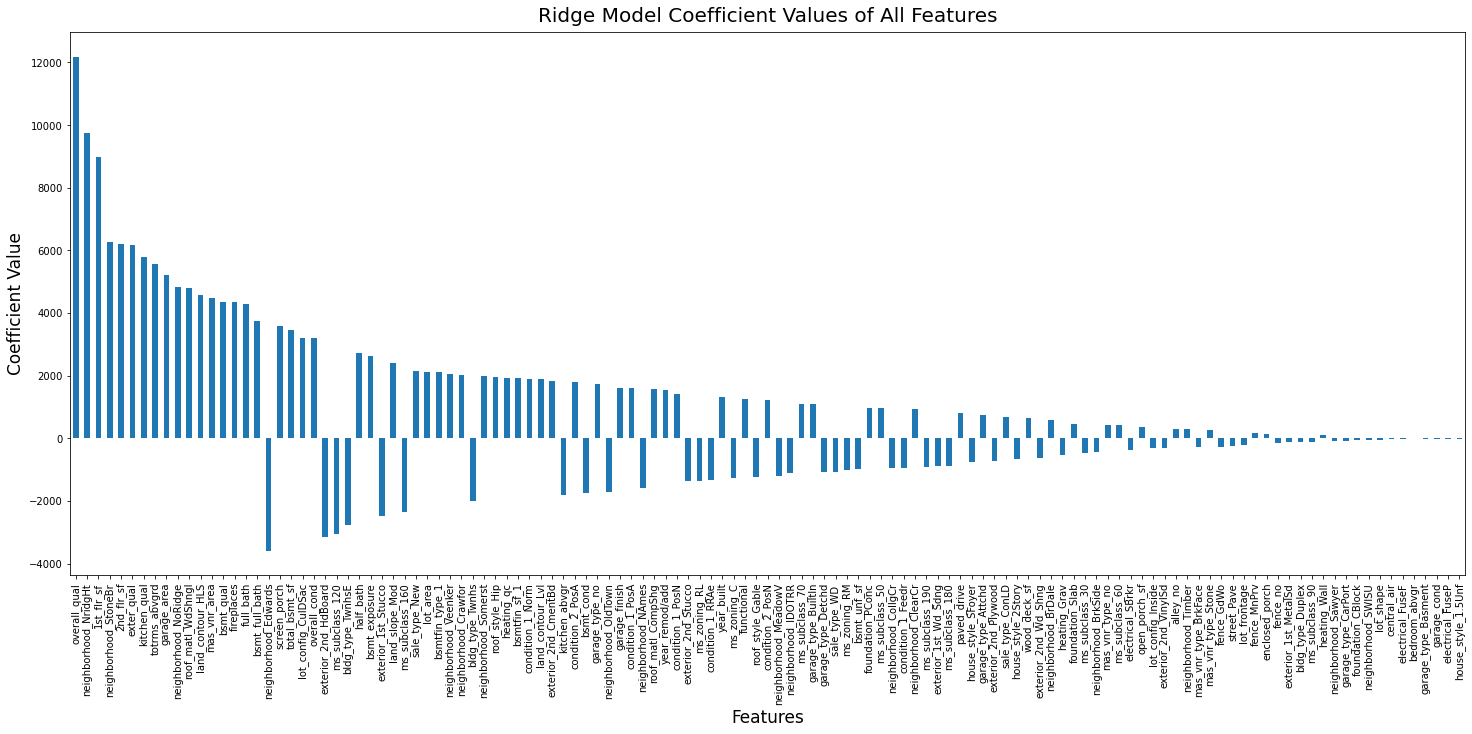

In [53]:
#plotting ridge coefficients for better visualisation
coeff_ax = pd.Series(list(ridge_coef_df['coefficient']), index=ridge_coef_df['feature']).plot(kind='bar', figsize=(25, 10));

coeff_ax.set_xlabel('Features', fontsize=17);
coeff_ax.set_ylabel('Coefficient Value', fontsize=17);
coeff_ax.set_title('Ridge Model Coefficient Values of All Features', pad=10.0, fontsize=20);

plt.show()

In [54]:
#calculating predicted y values using testing data
predict = ridge_model.predict(X_test_scale)

predict

array([187343.49608969, 214806.02467428,  75335.01456499, 114770.92119794,
       356124.55459606, 130023.94495903, 116911.57646451, 183480.51285161,
       139966.61208636, 148855.60691291, 165021.66308831, 219671.65935936,
       156463.7037496 , 157866.79956291, 217948.78941629, 157234.76655472,
       270711.49400623, 319694.31457068, 111712.94432128, 287194.34685312,
       146519.13895758, 109238.90940551, 172658.85573067, 182382.29691323,
       136162.96313908, 234520.79731054, 228128.00205118,  77009.22821931,
       191561.0865072 , 137349.28349557, 141507.1075716 , 173676.39663794,
       128791.87060957, 125987.37075313, 402443.98156259, 141268.38585164,
       106577.9333791 , 122276.84028225, 303219.56060428, 222158.88788762,
       145489.78567657, 338298.84123992, 174905.9434342 ,  94920.8083549 ,
       257072.08766953, 202075.0301965 ,  92027.43774169, 118209.49096636,
       224976.62010785, 262933.99761393, 141153.43027984, 142263.59525306,
       162231.42499091, 1

In [55]:
#calculating y residuals
residuals = y_test - predict

residuals.head()

1606   -11343.496090
5      -24806.024674
635      6164.985435
296     -8870.921198
1624    47875.445404
Name: saleprice, dtype: float64

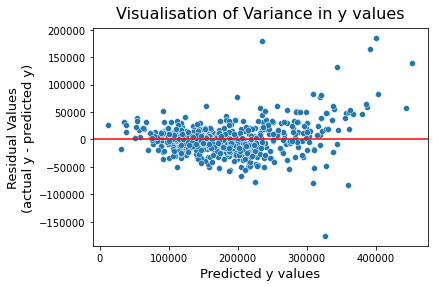

In [56]:
#plotting actual residuals against predicted y values
pred_residual_ax = sns.scatterplot(x=predict, y=residuals);

pred_residual_ax.set_xlabel('Predicted y values', fontsize=13);
pred_residual_ax.set_ylabel('Residual Values\n(actual y - predicted y)', fontsize=13);
pred_residual_ax.set_title('Visualisation of Variance in y values', pad=10.0, fontsize=16);

pred_residual_ax.axhline(1.25, color='red');

plt.show();

From the scatter plot of residual against predicted y values, we can see that majority of the points seem to be clustered around the y = 0 line, suggesting relatively low variance observed in the model.

Any outliers seen in the plot would affect the R^2 score. Taking care and eliminating these outliers will help to improve the R^2 score and allow the model to fit the data better.

## Visualize the Data

In [57]:
#filtering top 10 positive and top 10 negative ridge coefficients
pos10_coef = ridge_coef_df.sort_values(by=['coefficient'], ascending=False).head(10)
neg10_coef = ridge_coef_df.sort_values(by=['coefficient'], ascending=True).head(10)

pos_neg_coef = pd.concat([pos10_coef, neg10_coef])

print(pos_neg_coef)

                 feature  coefficient_absolute   coefficient
3           overall_qual          12190.247235  12190.247235
66  neighborhood_NridgHt           9742.275715   9742.275715
18            1st_flr_sf           8966.684445   8966.684445
71  neighborhood_StoneBr           6279.921686   6279.921686
19            2nd_flr_sf           6200.239409   6200.239409
8             exter_qual           6164.120125   6164.120125
25          kitchen_qual           5800.435472   5800.435472
26         totrms_abvgrd           5557.792678   5557.792678
30           garage_area           5227.105328   5227.105328
65  neighborhood_NoRidge           4829.552216   4829.552216
61  neighborhood_Edwards           3588.800412  -3588.800412
95  exterior_2nd_HdBoard           3157.508685  -3157.508685
42       ms_subclass_120           3056.259300  -3056.259300
83      bldg_type_TwnhsE           2770.031467  -2770.031467
92   exterior_1st_Stucco           2493.570119  -2493.570119
43       ms_subclass_160

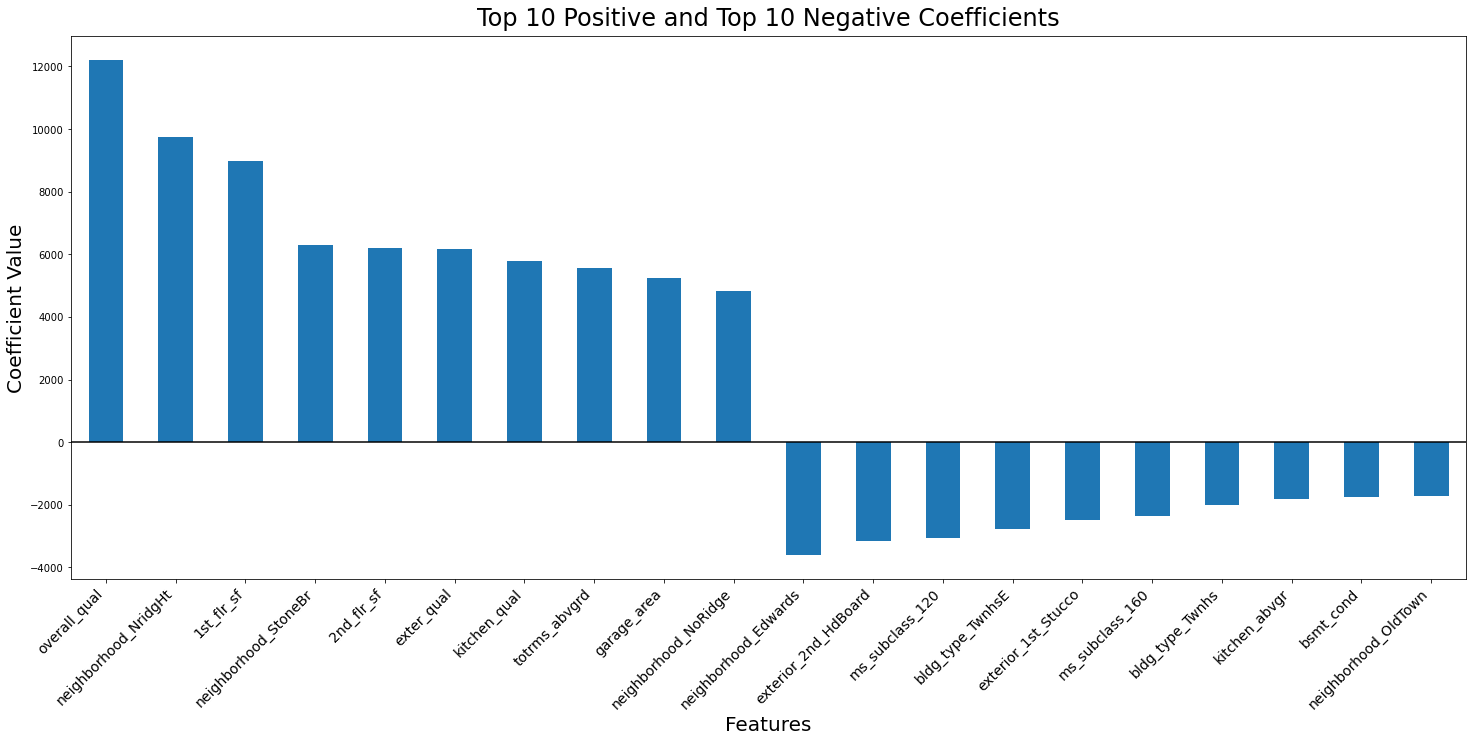

In [58]:
#plot top 10 positive and top 10 negative coefficients
pos_neg_coef_ax = pd.Series(list(pos_neg_coef['coefficient']), index=pos_neg_coef['feature']).plot(kind='bar', figsize=(25, 10));

pos_neg_coef_ax.set_xticklabels(labels=pos_neg_coef['feature'], rotation=45, ha='right', fontsize=14);
pos_neg_coef_ax.set_xlabel('Features', fontsize=20);
pos_neg_coef_ax.set_ylabel('Coefficient Value', fontsize=20);
pos_neg_coef_ax.set_title('Top 10 Positive and Top 10 Negative Coefficients', pad=10.0, fontsize=24);

pos_neg_coef_ax.axhline(y=0, color='black');

plt.show();

The coefficient plot above gives us an indication of the top features which affects the target (sale price), either negatively or positively.

Features that have positive coefficient values increases the sale price when the feature value increases while features with negative coefficient values decreases the sale price when the feature values is increased.

In [59]:
#filtering to show features with coefficients lower than absolute value of 100
low_coef = ridge_coef_df.loc[ridge_coef_df['coefficient_absolute'] < 100].sort_values(by=['coefficient_absolute'], ascending=False)

low_coef

,feature,coefficient_absolute,coefficient
107,heating_Wall,95.501720,95.501720
69,neighborhood_Sawyer,92.090609,-92.090609
114,garage_type_CarPort,87.443702,-87.443702
103,foundation_CBlock,63.690887,-63.690887
68,neighborhood_SWISU,55.099184,-55.099184
2,lot_shape,44.014865,-44.014865
17,central_air,33.377212,-33.377212
108,electrical_FuseF,21.956696,-21.956696
23,bedroom_abvgr,19.557440,19.557440
112,garage_type_Basment,18.938219,-18.938219


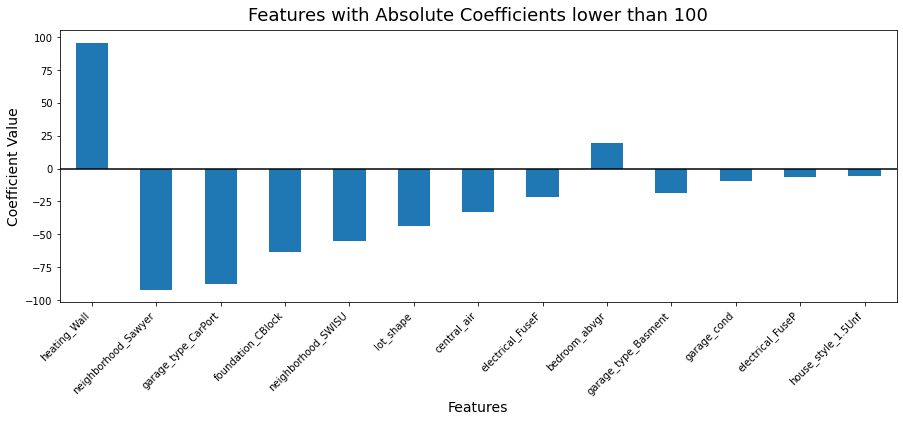

In [60]:
#plot coefficients that have absolute values of lower than 100 
low_coef_ax = pd.Series(list(low_coef['coefficient']), index=low_coef['feature']).plot(kind='bar', figsize=(15, 5));

low_coef_ax.set_xticklabels(labels=low_coef['feature'], rotation=45, ha='right', fontsize=10);
low_coef_ax.set_xlabel('Features', fontsize=14);
low_coef_ax.set_ylabel('Coefficient Value', fontsize=14);
low_coef_ax.set_title('Features with Absolute Coefficients lower than 100', pad=10.0, fontsize=18);

low_coef_ax.axhline(y=0, color='black');

plt.show();

The coefficient plot above shows the features that have minimal impact on the target (sale price). Changes to the feature value does not greatly affect the sale price.

In [61]:
#plot average sale prices of neighbourhoods with highest coefficients
#positive influence: Northridge Heights, Northridge
#negativen influence: Edwards, Northwest Ames, Old Town

nr_heights = train_clean_dummified.filter(['neighborhood_NridgHt', 'saleprice'], axis=1)
nr_heights = nr_heights.loc[nr_heights['neighborhood_NridgHt'] == 1]


northridge = train_clean_dummified.filter(['neighborhood_NoRidge', 'saleprice'], axis=1)
northridge = northridge.loc[northridge['neighborhood_NoRidge'] == 1]


edwards = train_clean_dummified.filter(['neighborhood_Edwards', 'saleprice'], axis=1)
edwards = edwards.loc[edwards['neighborhood_Edwards'] == 1]


n_ames = train_clean_dummified.filter(['neighborhood_NAmes', 'saleprice'], axis=1)
n_ames = n_ames.loc[n_ames['neighborhood_NAmes'] == 1]


oldtown = train_clean_dummified.filter(['neighborhood_OldTown', 'saleprice'], axis=1)
oldtown = oldtown.loc[oldtown['neighborhood_OldTown'] == 1]


#mean price of houses in the area
nr_heights_price = np.mean(nr_heights['saleprice'])
northridge_price = np.mean(northridge['saleprice'])
edwards_price = np.mean(edwards['saleprice'])
n_ames_price = np.mean(n_ames['saleprice'])
oldtown_price = np.mean(oldtown['saleprice'])

area_prices = pd.DataFrame({'neighborhood': ['Northridge_Heights', 'Northridge', 'Edwards', 'North_Ames', 'Old_Town'],
                            'price': [nr_heights_price, northridge_price, edwards_price, n_ames_price, oldtown_price]}).sort_values(by=['price'], ascending=False) 
                                                          
area_prices

,neighborhood,price
0,Northridge_Heights,322831.352459
1,Northridge,316294.125000
3,North_Ames,145905.816129
2,Edwards,130493.468531
4,Old_Town,125276.300613


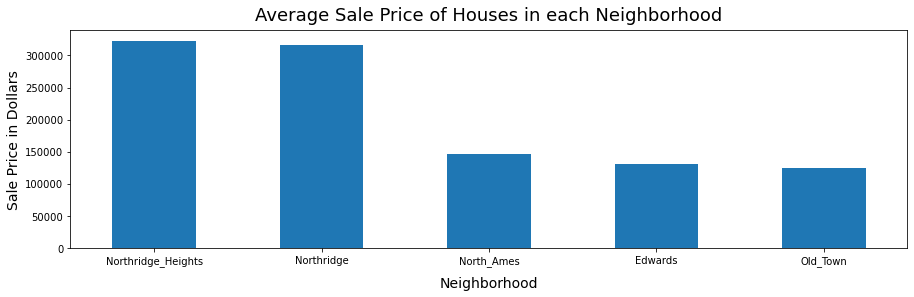

In [62]:
#plot the pricing of the houses sold in neighborhoods
area_prices_ax = pd.Series(list(area_prices['price']), index=area_prices['neighborhood']).plot(kind='bar', figsize=(15, 4), width=0.5);

area_prices_ax.set_xticklabels(labels=area_prices['neighborhood'], rotation=360, ha='center', fontsize=10);
area_prices_ax.set_xlabel('Neighborhood', fontsize=14, labelpad=10);
area_prices_ax.set_ylabel('Sale Price in Dollars', fontsize=14);
area_prices_ax.set_title('Average Sale Price of Houses in each Neighborhood', pad=10.0, fontsize=18);

plt.show();

The neighborhood areas that affects the sale price both positively and negatively are plotted in the bar chart above. Average sale prices of housing in neighborhoods with positive coefficient (the 2 bars on the left) are over twice the average sale prices of housing in neighborhoods with negative coefficient.

This can be a point for realtors to take note of for increasing their revenue, as selling houses in neighborhood areas with high coefficient values yield higher revenue through higher sale price.

In [63]:
#filtering to show overall quality with sale price
overall_quality = train_clean_dummified.groupby('overall_qual')['saleprice'].agg(['mean'])

#rename mean column
overall_quality = overall_quality.rename(columns={'mean': 'Mean_Saleprice'})

overall_quality

,Mean_Saleprice
overall_qual,
1,48725.000000
2,51081.000000
3,81309.103448
4,107744.037736
5,134963.644760
6,162891.102767
7,203430.285383
8,271437.044000
9,370197.376623


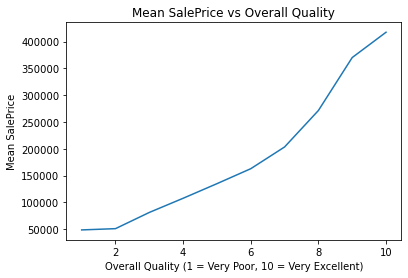

In [64]:
#plot line graph of overall quality against sale price
overall_quality['Mean_Saleprice'].plot();

plt.xlabel('Overall Quality (1 = Very Poor, 10 = Very Excellent)');
plt.ylabel('Mean SalePrice');
plt.title('Mean SalePrice vs Overall Quality');

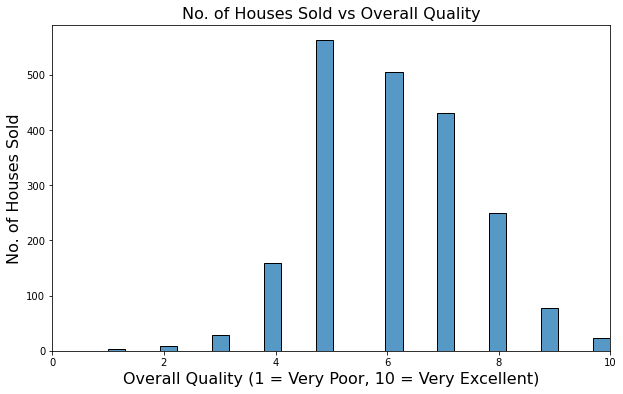

In [65]:
#plot No. of Houses Sold vs Overall Quality
fig, histo_overall_qual = plt.subplots(figsize=(10,6));
                                                                            
histo_overall_qual.set_title('No. of Houses Sold vs Overall Quality', fontsize=16);
histo_overall_qual.set_xlabel('Overall Quality (1 = Very Poor, 10 = Very Excellent)', fontsize=16);
histo_overall_qual.set_ylabel('No. of Houses Sold', fontsize=16);

histo_overall_qual = sns.histplot(x='overall_qual', data=train_clean_dummified);

plt.xlim(0,10); 

plt.show(); 

In [66]:
#filtering to show exterior quality with sale price
exterior_quality = train_clean_dummified.groupby('exter_qual')['saleprice'].agg(['mean'])

#rename mean column
exterior_quality = exterior_quality.rename(columns={'mean': 'Mean_Saleprice'})

exterior_quality

,Mean_Saleprice
exter_qual,
2,89801.192308
3,143270.978348
4,230802.484935
5,374460.308642


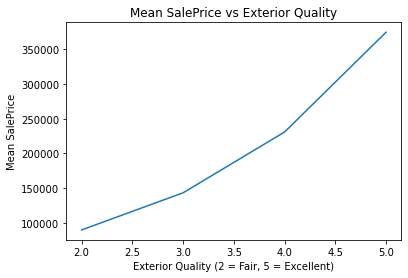

In [67]:
#plot line graph of exterior quality against sale price
exterior_quality['Mean_Saleprice'].plot();

plt.xlabel('Exterior Quality (2 = Fair, 5 = Excellent)');
plt.ylabel('Mean SalePrice');
plt.title('Mean SalePrice vs Exterior Quality');

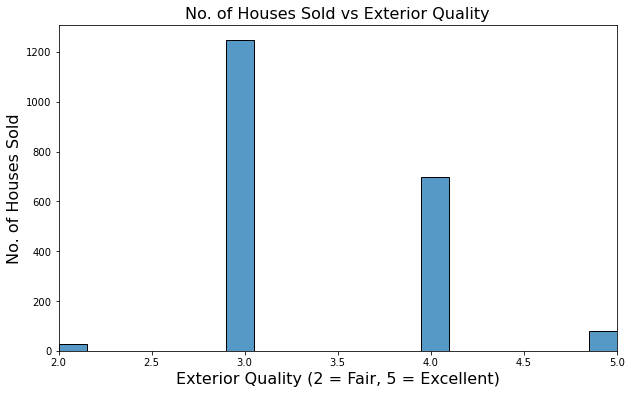

In [68]:
#plot No. of Houses Sold vs Exterior Quality
fig, histo_exter_qual = plt.subplots(figsize=(10,6));

histo_exter_qual.set_title('No. of Houses Sold vs Exterior Quality', fontsize=16);
histo_exter_qual.set_xlabel('Exterior Quality (2 = Fair, 5 = Excellent)', fontsize=16);
histo_exter_qual.set_ylabel('No. of Houses Sold', fontsize=16);

histo_exter_qual = sns.histplot(x='exter_qual', data=train_clean_dummified);

plt.xlim(2,5);

plt.show();

In [69]:
#filtering to show kitchen quality with sale price
kitchen_quality = train_clean_dummified.groupby('kitchen_qual')['saleprice'].agg(['mean'])

#rename mean column
kitchen_quality = kitchen_quality.rename(columns={'mean': 'Mean_Saleprice'})

kitchen_quality

,Mean_Saleprice
kitchen_qual,
2,101334.957447
3,139501.607450
4,211629.451613
5,336424.463576


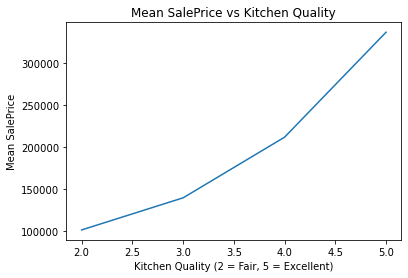

In [70]:
#plot line graph of kitchen quality against sale price
kitchen_quality['Mean_Saleprice'].plot();

plt.xlabel('Kitchen Quality (2 = Fair, 5 = Excellent)');
plt.ylabel('Mean SalePrice');
plt.title('Mean SalePrice vs Kitchen Quality');

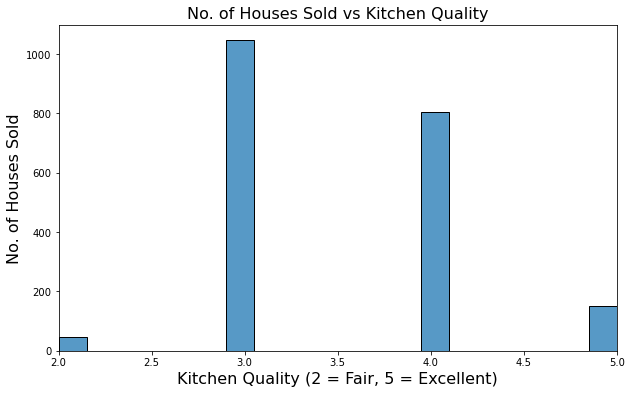

In [71]:
#plot histogram of No. of Houses Sold vs Kitchen Quality
fig, histo_kitchen_qual = plt.subplots(figsize=(10,6));

histo_kitchen_qual.set_title('No. of Houses Sold vs Kitchen Quality', fontsize=16);
histo_kitchen_qual.set_xlabel('Kitchen Quality (2 = Fair, 5 = Excellent)', fontsize=16);
histo_kitchen_qual.set_ylabel('No. of Houses Sold', fontsize=16);

histo_kitchen_qual = sns.histplot(x='kitchen_qual', data=train_clean_dummified);
plt.xlim(2,5);

plt.show();

The qualities of the house (overall quality, exterior quality and kitchen quality) all positively affects the sale price. Higher quality values yield higher mean sale prices.

For houses that have below average qualities, it is advisable to refurbish the house so as to increase the sale price.

For houses with average/good qualities, further improvements to the house will help to differentiate the houses from others in the market and yield even high sale price.

In [72]:
#filtering to show fireplace number with sale price
fireplacenumber = train_clean_dummified.groupby('fireplaces')['saleprice'].agg(['mean'])

#rename mean column
fireplacenumber = fireplacenumber.rename(columns={'mean': 'Mean_Saleprice'})

fireplacenumber

,Mean_Saleprice
fireplaces,
0,142001.103000
1,215478.776169
2,239893.589041
3,234808.333333
4,260000.000000


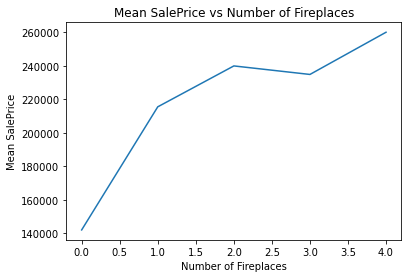

In [73]:
#plot line graph of fireplace number against sale price
fireplacenumber['Mean_Saleprice'].plot();

plt.xlabel('Number of Fireplaces');
plt.ylabel('Mean SalePrice');
plt.title('Mean SalePrice vs Number of Fireplaces');

Generally, increasing the number of fireplaces in a house will also increase the mean sale price of the house. The biggest jump in sale price is seen when comparing a house with no fireplace (at around 140k dollars) with a house with 1 fireplace (at around 210k dollars).

Revenue can be increased through the increase in sale price by selling more houses with more fireplaces.

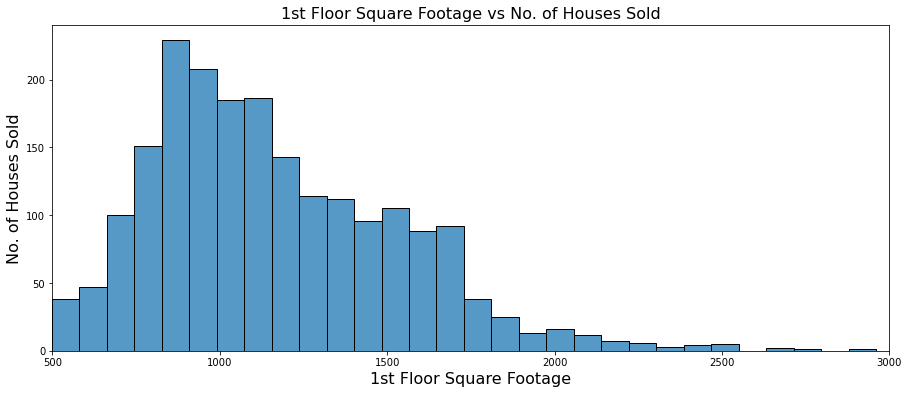

In [74]:
#plot 1st floor square foot against number of houses sold
fig, histo_1st_flr_sf = plt.subplots(figsize=(15,6));

histo_1st_flr_sf.set_title('1st Floor Square Footage vs No. of Houses Sold', fontsize=16);
histo_1st_flr_sf.set_xlabel('1st Floor Square Footage', fontsize=16);
histo_1st_flr_sf.set_ylabel('No. of Houses Sold', fontsize=16);

histo_1st_flr_sf = sns.histplot(x='1st_flr_sf', data=train_clean_dummified);

plt.xlim(500,3000);

plt.show();

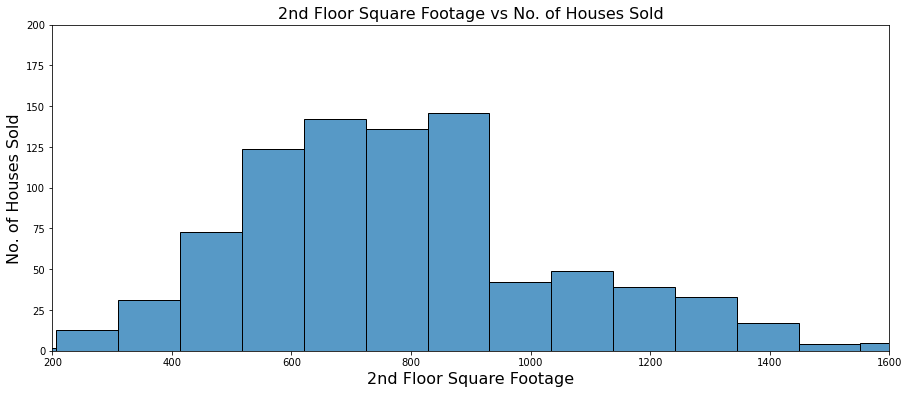

In [75]:
#plot 2nd floor square foot against number of houses sold
fig, histo_2nd_flr_sf = plt.subplots(figsize=(15,6));

histo_2nd_flr_sf.set_title('2nd Floor Square Footage vs No. of Houses Sold', fontsize=16);
histo_2nd_flr_sf.set_xlabel('2nd Floor Square Footage', fontsize=16);
histo_2nd_flr_sf.set_ylabel('No. of Houses Sold', fontsize=16);

histo_2nd_flr_sf = sns.histplot(x='2nd_flr_sf', data=train_clean_dummified);

plt.xlim(200,1600);
plt.ylim(0,200);

plt.show();

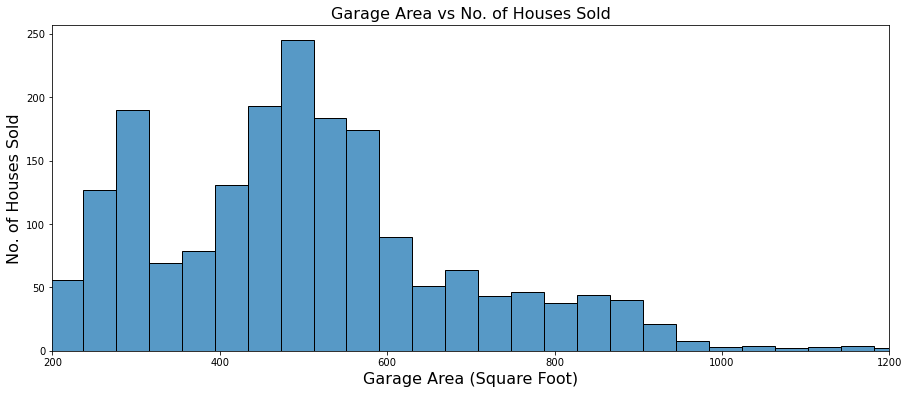

In [76]:
#plot garage area against number of houses sold
fig, histo_garage_area = plt.subplots(figsize=(15,6));

histo_garage_area.set_title('Garage Area vs No. of Houses Sold', fontsize=16);
histo_garage_area.set_xlabel('Garage Area (Square Foot)', fontsize=16);
histo_garage_area.set_ylabel('No. of Houses Sold', fontsize=16);

histo_garage_area = sns.histplot(x='garage_area', data=train_clean_dummified);

plt.xlim(200,1200);

plt.show();

Bigger houses (with higher square footage) results in higher sale price.

However, this does not automatically mean a higher sales volume. This is because higher sale prices mean lesser people are able to afford it, leading to fewer potential buyers and therefore, lesser number of houses sold.

When trying to maximise revenue, the focus should be to find a balance between the house size and sale price.

Houses that are most commonly sold have 1st floor square footage of 800-900 sqft, 2nd floor square footage of 500-900 sqft and garage area of 500 sqft.

## Conclusions and Recommendations

To maximise the revenue and give realtors of Skywalker Property Advisors a competitive advantage in the Ames Housing Market, the following points are recommended and should be taken into consideration:
- Focus on marketing the houses in Northridge Heights and Northridge as they have the highest mean sale price
- Advise clients with below average housing quality to refurbish their home, so as to improve their house sale price
- Focus on marketing houses with at least 1 fireplace and encourage clients to build a fireplace if they do not have one as houses with fireplaces have higher sale prices
- Avoid houses with hardboard or stucco exteriors as they are prone to rot and mold ([*Hardboard*](https://www.ehow.co.uk/about_6460464_hardboard-information.html), [*Stucco*](https://homesteady.com/how-6725893-paint-synthetic-stucco.html)) especially with the above average snowfall in Ames ([*Ames Weather*](https://www.bestplaces.net/climate/city/iowa/ames))
- A bigger house may have a higher potential sale price, but that also means that it could have a lower chance of being sold due to a lower number of potential buyers who can afford it


Further improvements to the model and project includes:

- collect data on total number of houses in each neighborhood 
    - this would allow us to evaluate the percentage of houses sold across all neighborhoods
- collect data on demographic of neighborhood and buyers
    - examples include age range, marital status, family size, number of kids
- collect sale price in real value to take into account inflation
    - rate of inflation to allow us to better evaluate past sale prices based on today's economy
- further cleaning of the current datasets to remove outliers and improve model fitting
- try out other regression models

## Import Cleaned Test CSV File

In [77]:
test_clean_dummified = pd.read_csv('../data/test_cleaned_dummified.csv')

print(test_clean_dummified.shape)
test_clean_dummified.head()

(878, 204)


,id,lot_frontage,lot_area,lot_shape,utilities,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,misc_val,mo_sold,yr_sold,ms_subclass_30,ms_subclass_40,ms_subclass_45,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,ms_subclass_120,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_FV,ms_zoning_I,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_Pave,alley_no,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Norm,condition_2_PosA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_WdShing,exterior_1st_Wd_Sdng,exterior_2nd_AsphShn,exterior_2nd_BrkFace,exterior_2nd_Brk_Cmn,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd_Sdng,exterior_2nd_Wd_Shng,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_Stone,mas_vnr_type_no,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasA,heating_GasW,heating_Grav,electrical_FuseF,electrical_FuseP,electrical_SBrkr,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_no,fence_GdWo,fence_MnPrv,fence_MnWw,fence_no,misc_feature_Othr,misc_feature_Shed,misc_feature_no,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,2658,69.0,9142,4,4,6,8,1910,1950,0.0,3,2,2,3,0,1,0,1,0,1020,1020,4,0,908,1020,0,0,0,2,0,4,2,2,9,8,0,0,1,1,440,1,1,2,0,60,112,0,0,0,0,0,4,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,2718,0.0,9662,3,4,5,4,1977,1977,0.0,3,3,4,3,0,1,0,1,0,1967,1967,3,1,1967,0,0,0,0,2,0,6,2,3,10,8,0,0,3,2,580,3,3,2,170,0,0,0,0,0,0,0,8,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,

#### Further drop columns that were dropped after EDA for Train CSV

Drop the extra columns that was filtered away in the train_cleaned_dummified.csv (during EDA) where correlation with each other was above 0.85 and correlation with sale price was lesser than 0.05.

In [78]:
#drop columns that had lesser than 0.05 correlation with saleprice
test_below5per = []
for col in cols_below5per:
    if col in test_clean_dummified:
        test_below5per.append(col)

test_clean_dummified = test_clean_dummified.drop(columns=test_below5per)


In [79]:
test_clean_dummified.shape

(878, 139)

In [80]:
#drop columns that had less than 0.85 correlation with each other
test_clean_dummified = test_clean_dummified.drop(columns=['exterior_2nd_Wd_Sdng', 
                                                          'fireplace_qu', 
                                                          'ms_subclass_45', 
                                                          'ms_zoning_FV', 
                                                          'exterior_1st_HdBoard', 
                                                          'garage_cars', 
                                                          'garage_qual', 
                                                          'exterior_2nd_MetalSd', 
                                                          'exterior_1st_VinylSd', 
                                                          'bldg_type_2fmCon', 
                                                          'exterior_1st_CemntBd'])


In [81]:
test_clean_dummified.shape

(878, 128)

In [82]:
#find columns that are in test_clean_dummified but not in train_clean_dummified
not_in_train_df = list((test_clean_dummified.columns).difference(train_clean_dummified.columns))

#drop the columns that are not found in train_clean_dummified to maintain consistency in columns
test_clean_dummified = test_clean_dummified.drop(columns=not_in_train_df)

In [83]:
test_clean_dummified.shape

(878, 120)

In [84]:
#find columns that are in test_clean_dummified but not in train_clean_dummified 
not_in_test_df = list((train_clean_dummified.columns).difference(test_clean_dummified.columns))

#add the columns that are not found in test_clean_dummified to maintain consistency in columns
for column_index in range(len(not_in_test_df)):
    if not_in_test_df[column_index] != 'saleprice':
        test_clean_dummified[not_in_test_df[column_index]] = 0



In [85]:
test_clean_dummified.shape

(878, 124)

## Export and save Final Cleaned Test data into CSV

In [86]:
test_clean_dummified.to_csv('../data/test_final.csv', index=False)

## Import Final Cleaned Test CSV to run in model

In [87]:
test_final = pd.read_csv('../data/test_final.csv')

print(test_final.shape)
test_final.head()


(878, 124)


,id,lot_frontage,lot_area,lot_shape,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmt_unf_sf,total_bsmt_sf,heating_qc,central_air,1st_flr_sf,2nd_flr_sf,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_finish,garage_area,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,ms_subclass_30,ms_subclass_50,ms_subclass_60,ms_subclass_70,ms_subclass_90,ms_subclass_120,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_no,land_contour_HLS,land_contour_Lvl,lot_config_CulDSac,lot_config_Inside,land_slope_Mod,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_NAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_2_PosA,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_2Story,house_style_SFoyer,roof_style_Gable,roof_style_Hip,roof_matl_WdShngl,exterior_1st_MetalSd,exterior_1st_Stucco,exterior_1st_Wd_Sdng,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_Plywood,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd_Shng,mas_vnr_type_BrkFace,mas_vnr_type_Stone,mas_vnr_type_no,foundation_CBlock,foundation_PConc,foundation_Slab,heating_Grav,electrical_FuseF,electrical_FuseP,electrical_SBrkr,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_no,fence_GdWo,fence_MnPrv,fence_no,sale_type_ConLD,sale_type_New,sale_type_WD,condition_2_PosN,heating_Wall,ms_zoning_C,roof_matl_CompShg
0,2658,69.0,9142,4,6,8,1910,1950,0.0,3,2,3,0,1,0,1020,1020,4,0,908,1020,0,2,0,4,2,2,9,8,0,1,440,1,2,0,60,112,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,2718,0.0,9662,3,5,4,1977,1977,0.0,3,4,3,0,1,0,1967,1967,3,1,1967,0,0,2,0,6,2,3,10,8,0,3,580,3,2,170,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,2414,58.0,17104,3,7,5,2006,2006,0.0,4,4,4,3,6,554,100,654,5,1,664,832,1,2,1,3,1,4,7,8,1,2,426,3,2,100,24,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,1989,60.0,8520,4,5,6,1923,2006,0.0,4,3,3,0,1,0,968,968,3,1,968,0,0,1,0,2,1,3,5,8,0,1,480,3,0,0,0,184,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,625,0.0,9500,3,6,5,1963,1963,247.0,3,4,3,0,4,609,785,1394,4,1,1394,0,1,1,1,3,1,3,6,8,2,2,514,3,2,0,76,0,185,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [88]:
#create final dataframe X_submit, the features for submission test data
#X_submit consists of all columns in the test_final csv file, except column 'id'
X_submit = test_clean_dummified.drop(columns=['id'])

In [89]:
X_submit.shape

(878, 123)

In [90]:
#scale the X_submit values to ensure the variables are all on the same scale
sc = StandardScaler()
X_submit_sc = ss.fit_transform(X_submit)

In [91]:
#instantiate the ridge model
ridge_final = RidgeCV(alphas=np.logspace(0, 5, 200))

#fit the model with the train data set from earlier --> X_train_scale
ridge_final.fit(X_train_scale, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]))

In [92]:
#predict y values (the target: saleprice)
predict_final = ridge_final.predict(X_submit_sc)

#save predicted values into a dataframe
predict_df = pd.DataFrame(predict_final)

predict_df.head()

,0
0,184018.643548
1,178819.596185
2,206846.192489
3,173977.912648
4,193662.992597


In [93]:
#create a dataframe with the 'id' column of the test_final.csv --> to be used for submission
kaggle_submit = test_final[['id']]

#rename 'id' to 'Id'
kaggle_submit = kaggle_submit.rename(columns={'id': 'Id'})

#add column 'SalePrice' into kaggle_submit and save the predicted values into the column
kaggle_submit['SalePrice'] = predict_df

In [94]:
kaggle_submit.head()

,Id,SalePrice
0,2658,184018.643548
1,2718,178819.596185
2,2414,206846.192489
3,1989,173977.912648
4,625,193662.992597


## Export and save Final Cleaned Test data into CSV

In [95]:
kaggle_submit.to_csv('../data/kaggle_submit.csv', index=False)